In [1]:
pwd

'/home/lulu/project/Galvanize/capstone-kickoffs/Capstons_datasets'

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
import json

# load csv data

In [4]:
tmdb_credits_path = 'tmdb-5000-movie-dataset/tmdb_5000_credits.csv'
tmdb_movie_path ='tmdb-5000-movie-dataset/tmdb_5000_movies.csv'

In [5]:
credits_df = pd.read_csv(tmdb_credits_path)
movie_df = pd.read_csv(tmdb_movie_path)

In [6]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [70]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# cast, crew- json form

In [71]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [9]:
movie_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [10]:
movie_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# genres,keywords,production_companies,production_countries,spoken_languages - json form

In [11]:
# movie_df_genres = json.loads(movie_df['genres'])
# movie_df_genres
# TypeError: the JSON object must be str, bytes or bytearray, not Series

In [12]:
movie_df_copy = movie_df.copy()
movie_df_copy.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


# 'genres' : json to string

In [13]:
movie_df_genres = movie_df_copy['genres'].map(json.loads)

In [14]:
movie_df_copy['genres']=movie_df_copy['genres'][1:].map(json.loads)

In [15]:
def getname(x):
    list = []
    for i in x:
        list.append(i['name'])
    return '|'.join(list)

In [16]:
movie_df_copy['genres']=movie_df_copy['genres'][1:].map(getname)

In [17]:
movie_df_copy['genres'].head(3)

0                         NaN
1    Adventure|Fantasy|Action
2      Action|Adventure|Crime
Name: genres, dtype: object

In [18]:
movie_df_copy

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,NaN,http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403

In [19]:
movie_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4802 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [20]:
movie_df_copy['genres'].head()

0                                 NaN
1            Adventure|Fantasy|Action
2              Action|Adventure|Crime
3         Action|Crime|Drama|Thriller
4    Action|Adventure|Science Fiction
Name: genres, dtype: object

In [21]:
genres_list=set()
row =0
for i in movie_df_copy['genres'].str.split('|'):
    try:
        genres_list=set().union(i,genres_list)
    except:
        print(row)
        continue
    row +=1
genres_list=list(genres_list)
genres_list.remove('')

0


In [22]:
# 0 row genres_data read error

In [23]:
genres_df=pd.DataFrame()
for n in genres_list:
    genres_df[n]=movie_df_copy['genres'].str.contains(n).apply(lambda x:1 if x else 0)

In [24]:
genres_df.head(5)

,Science Fiction,Crime,History,Documentary,Romance,Fantasy,War,Foreign,Comedy,Animation,Thriller,Horror,Mystery,Action,Music,Family,Drama,Western,Adventure,TV Movie
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [25]:
movie_df_copy['release_date'].head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [26]:
movie_df_copy.loc[movie_df_copy['release_date'].isnull(),:]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,,NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


In [27]:
# 4553  row 'release_date' is null

In [36]:
year_list = []
for data in movie_df_copy['release_date']:
#     print(index)
    try:
        year_list.append(data[0:4])
    except:
        year_list.append('2014')
        continue

# print(year_list)
ser = Series(year_list)
# year_df = pd.DataFrame([year_list], columns='release_year')
year_df = pd.DataFrame({'release_year':year_list})

In [32]:
ser.head()

0    2009
1    2007
2    2015
3    2012
4    2012
dtype: object

In [37]:
year_df.head()

,release_year
0,2009
1,2007
2,2015
3,2012
4,2012


In [41]:
new_genres_df = pd.concat([genres_df,year_df],axis=1)
new_genres_df.index=ser
genres_df_sort = new_genres_df.sort_index()

In [42]:
genres_df_sort.head(5)

,Science Fiction,Crime,History,Documentary,Romance,Fantasy,War,Foreign,Comedy,Animation,...,Horror,Mystery,Action,Music,Family,Drama,Western,Adventure,TV Movie,release_year
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1916
1925,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1925
1927,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1927
1929,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1929
1929,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1929


In [ ]:
genres_df_sort.info()

In [61]:
genres_df_sort_groupby_year = genres_df_sort.groupby('release_year').sum()
genres_df_sort_groupby_year

,Science Fiction,Crime,History,Documentary,Romance,Fantasy,War,Foreign,Comedy,Animation,Thriller,Horror,Mystery,Action,Music,Family,Drama,Western,Adventure,TV Movie
release_year,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1925,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1927,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1929,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0
1930,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1932,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1933,0,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0
1934,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1935,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [54]:
genres_sum=genres_df_sort_groupby_year.sum()
genres_sum

Science Fiction     535
Crime               697
History             198
Documentary         111
Romance             895
Fantasy             424
War                 145
Foreign              35
Comedy             1723
Animation           235
Thriller           1275
Horror              520
Mystery             349
Action             1154
Music               186
Family              514
Drama              2298
Western              83
Adventure           790
TV Movie              9
dtype: int64

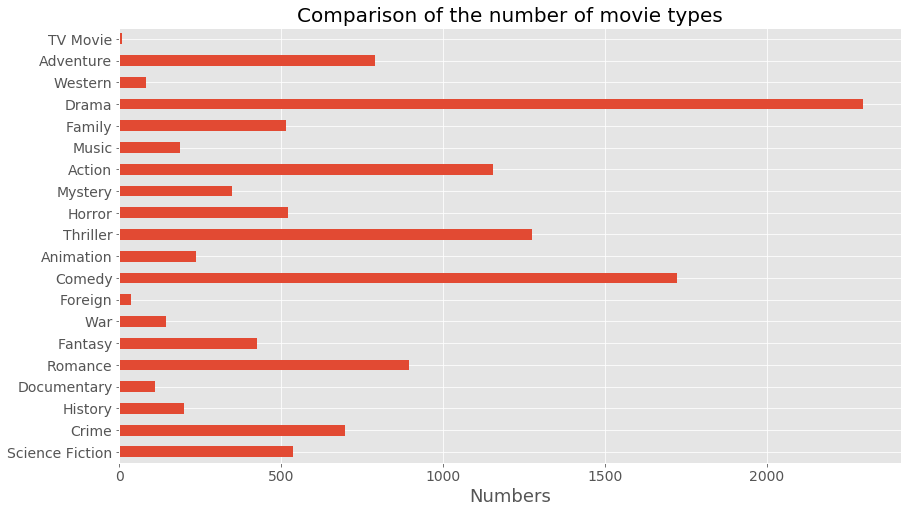

In [55]:
genres_sum.plot(kind='barh',label='genres',figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Comparison of the number of movie types',fontsize=20)
plt.xlabel('Numbers',fontsize=18)
plt.show()

In [57]:
genres_per = genres_sum/genres_sum.sum()

In [58]:
others = 0.01
genres_pern = genres_per[genres_per>=others]
genres_pern['other'] = genres_per[genres_per < others].sum()
explode = (genres_pern <= 0.02)/20 + 0.05

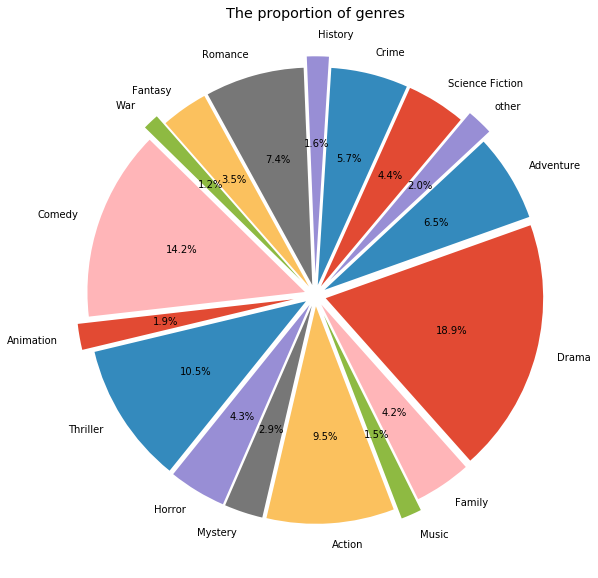

In [59]:
genres_pern.plot(kind = 'pie',label='',startangle=50,shadow = False,figsize = (10,10), autopct = '%1.1f%%',explode=explode)
plt.title('The proportion of Genres')
plt.show()

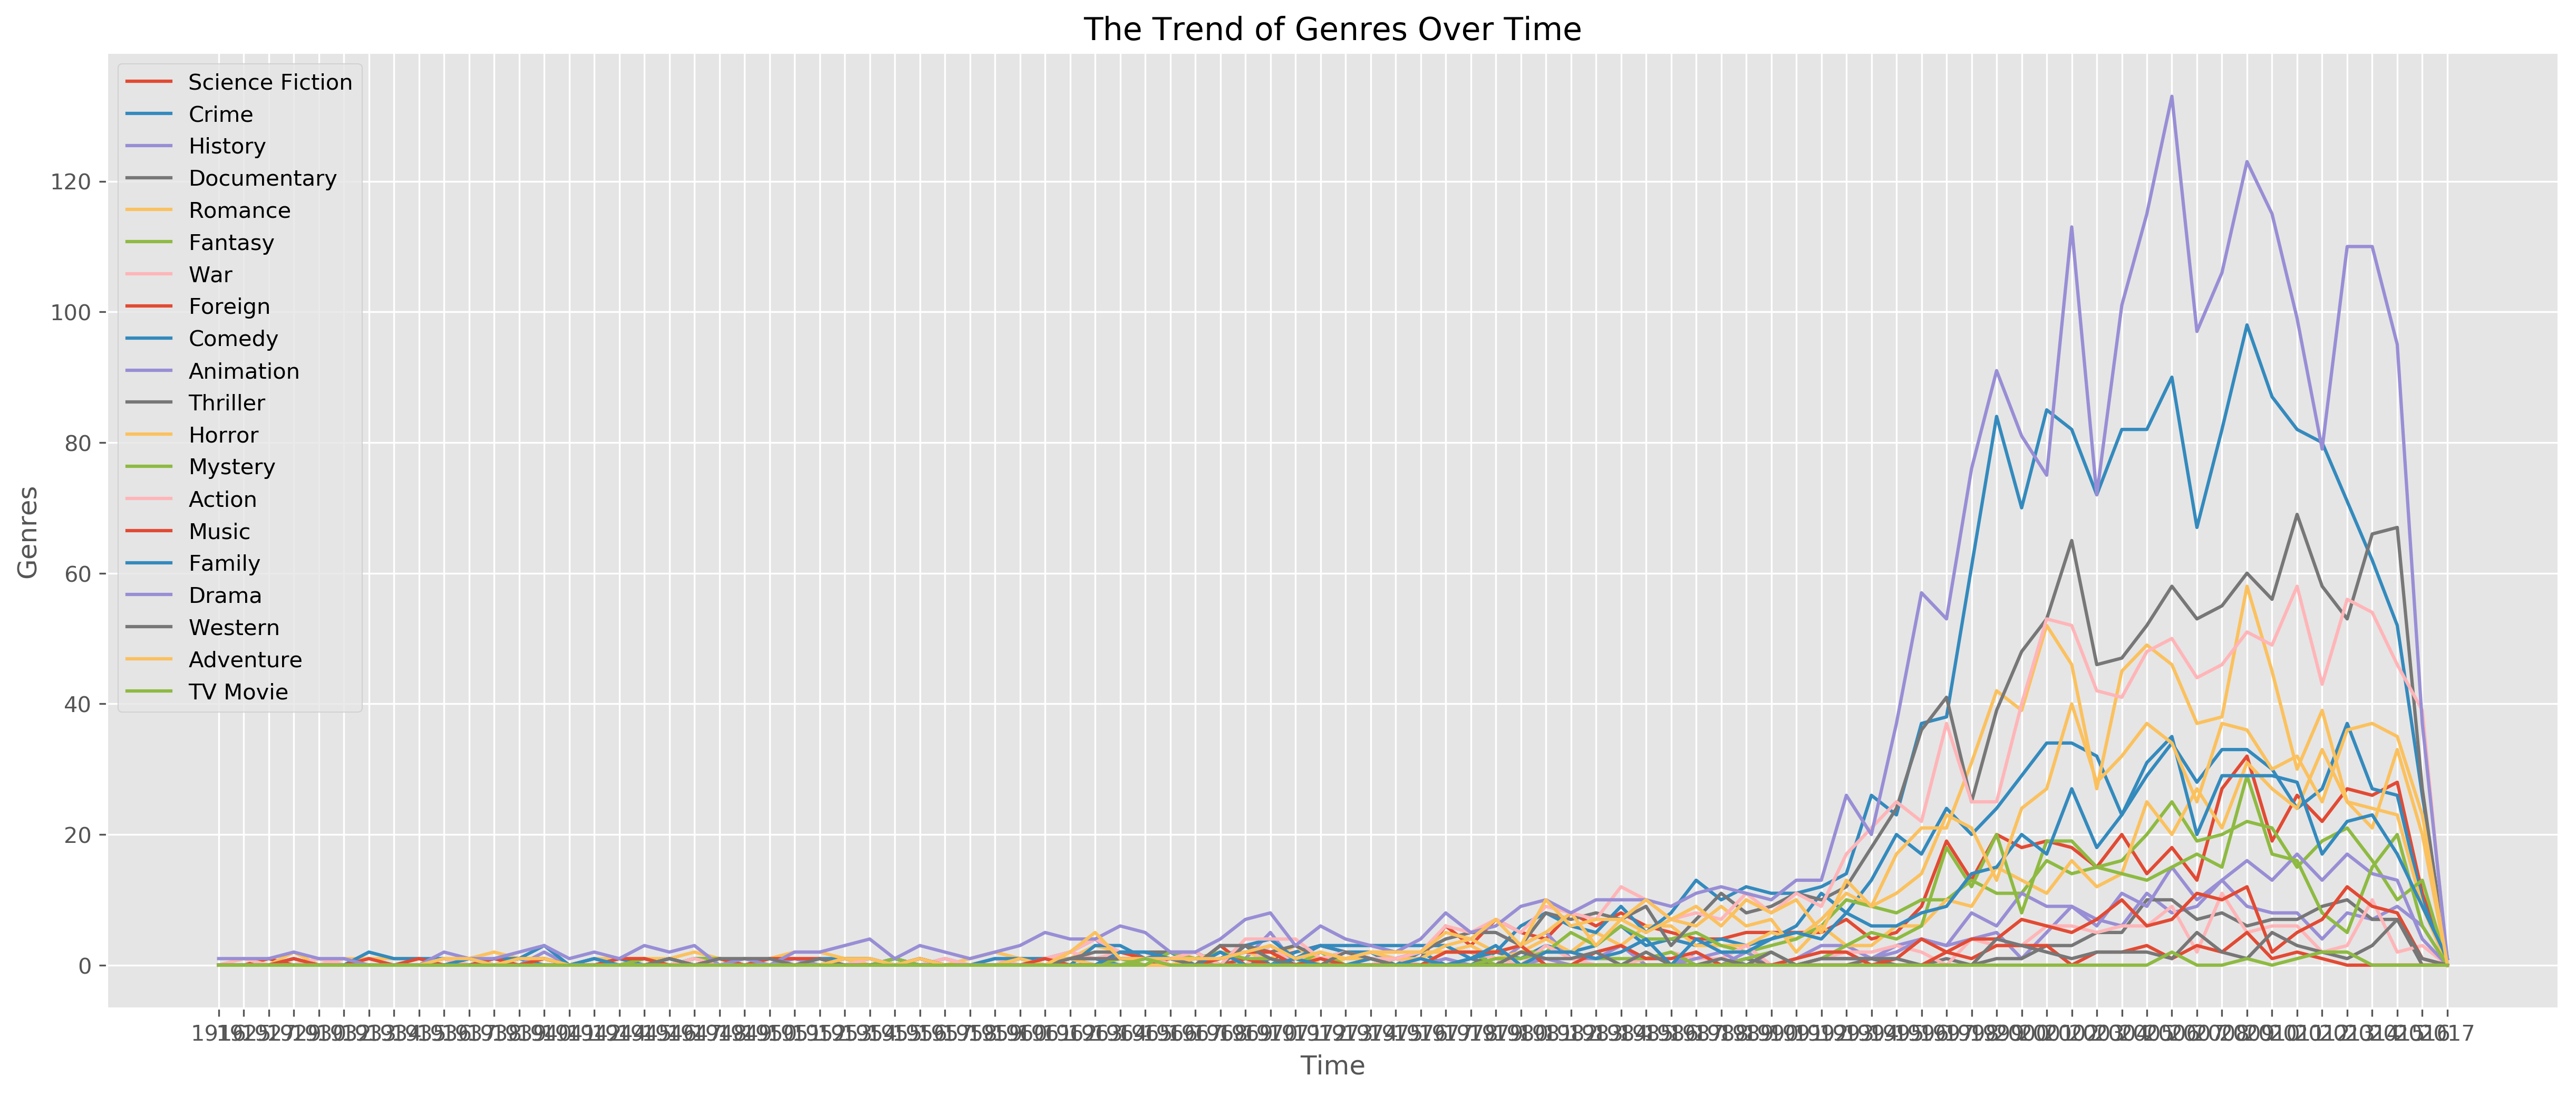

In [69]:
plt.figure(figsize=(20,8),edgecolor='red',dpi=300)
plt.plot(genres_df_sort_groupby_year, label = genres_df_sort_groupby_year.columns)
plt.legend(genres_df_sort_groupby_year)
plt.xlabel('Time')
plt.ylabel('Genres')
plt.title('The Trend of Genres Over Time')
plt.show()

In [ ]:
plt.figure(figsize=(20,8),edgecolor='red',dpi=300)
plt.plot(genres_df_sort_groupby_year, label = genres_df_sort_groupby_year.columns)
plt.legend(genres_df_sort_groupby_year)
plt.xlabel('Time')
plt.ylabel('Genres')
plt.title('The Trend of Genres Over Time')
plt.show()

In [ ]:
# clean data movie_df_copy : coun

1.The Profitability of Different Styles of Movies
2.Movie Preferences in Different Regions
3.The Impact of Movies Cost on Movies Quality
4.Competition between film production companies
3.The Influence of Actors or Directors on Movie Ratings
5.the Influence of International Actor or Director on Profitability
6.Movie Preferences in Different Regions